# **Fall Detection Machine Learning Model**

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving SmartFall Testing.csv to SmartFall Testing.csv


In [ ]:
import pandas as pd
df = pd.read_csv("SmartFall Testing.csv")
print(df.head())


    ms_accelerometer_x   ms_accelerometer_y   ms_accelerometer_z  outcome
0             0.986328             0.210938            -0.105957        0
1             0.977051             0.203125            -0.109375        0
2             0.977051             0.203125            -0.109375        0
3             0.944336             0.191162            -0.107422        0
4             0.808838             0.211670            -0.071045        0


In [ ]:
import os
os.listdir('/content')  # Lists all files in the current directory


['.config', 'SmartFall Testing.csv', 'sample_data']

In [ ]:
from google.colab import files
uploaded = files.upload()  # Select and upload the CSV file again

Saving SmartFall Training.csv to SmartFall Training.csv


In [ ]:
import pandas as pd

# Load datasets
train_df = pd.read_csv('/content/SmartFall Training.csv')
test_df = pd.read_csv('/content/SmartFall Testing.csv')

# Display first few rows
print(train_df.head())


    ms_accelerometer_x   ms_accelerometer_y   ms_accelerometer_z  outcome
0             1.058105             0.096436             0.113037        0
1             0.718506             0.233887             0.220703        0
2             0.718506             0.233887             0.220703        0
3             0.960205             0.190430             0.051270        0
4             0.960205             0.190430             0.051270        0


In [ ]:
print(train_df.isnull().sum())  # Count of missing values per column


 ms_accelerometer_x    0
 ms_accelerometer_y    0
 ms_accelerometer_z    0
outcome                0
dtype: int64


In [ ]:
train_df = train_df.dropna()  # Remove rows with missing values


In [ ]:
train_df.fillna(train_df.mean(), inplace=True)  # Replace with mean values


In [ ]:
print(train_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92781 entries, 0 to 92780
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0    ms_accelerometer_x  92781 non-null  float64
 1    ms_accelerometer_y  92781 non-null  float64
 2    ms_accelerometer_z  92781 non-null  float64
 3   outcome              92781 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 2.8 MB
None


In [ ]:
import pandas as pd

# Load dataset (update file name if needed)
df = pd.read_csv('/content/SmartFall Training.csv')

# Display column names and first few rows
print(df.columns)
print(df.head())


Index([' ms_accelerometer_x', ' ms_accelerometer_y', ' ms_accelerometer_z',
       'outcome'],
      dtype='object')
    ms_accelerometer_x   ms_accelerometer_y   ms_accelerometer_z  outcome
0             1.058105             0.096436             0.113037        0
1             0.718506             0.233887             0.220703        0
2             0.718506             0.233887             0.220703        0
3             0.960205             0.190430             0.051270        0
4             0.960205             0.190430             0.051270        0


In [ ]:
print(df.columns)  # List all column names


Index([' ms_accelerometer_x', ' ms_accelerometer_y', ' ms_accelerometer_z',
       'outcome'],
      dtype='object')


In [ ]:
df.columns = df.columns.str.strip()  # Remove leading/trailing spaces
print(df.columns)  # Check again


Index(['ms_accelerometer_x', 'ms_accelerometer_y', 'ms_accelerometer_z',
       'outcome'],
      dtype='object')


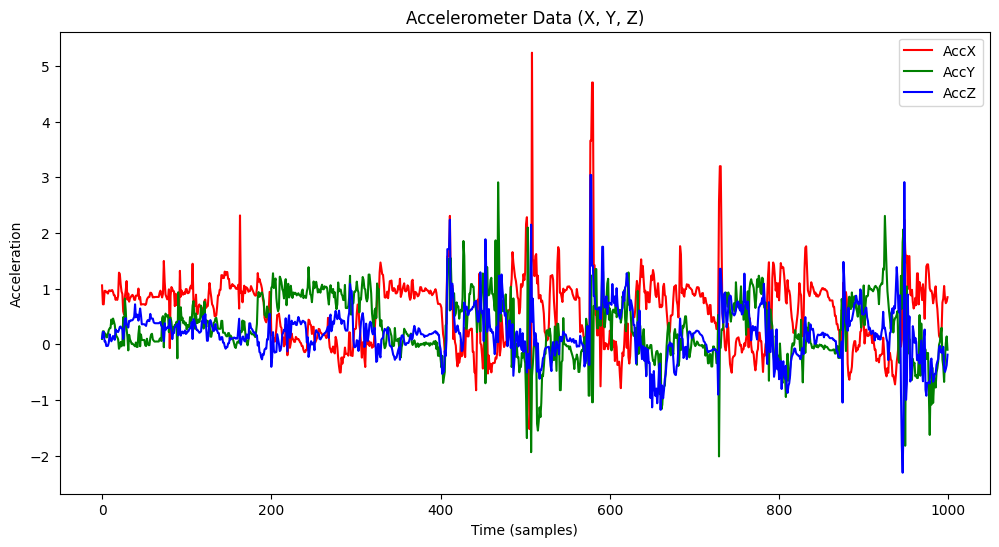

In [ ]:
import matplotlib.pyplot as plt
df_subset = df[:1000]

# Plot acceleration data
plt.figure(figsize=(12, 6))
plt.plot(df_subset['ms_accelerometer_x'], label='AccX', color='r')
plt.plot(df_subset['ms_accelerometer_y'], label='AccY', color='g')
plt.plot(df_subset['ms_accelerometer_z'], label='AccZ', color='b')

plt.title("Accelerometer Data (X, Y, Z)")
plt.xlabel("Time (samples)")
plt.ylabel("Acceleration")
plt.legend()
plt.show()


## **A histogram** helps us understand the distribution of acceleration values.
We'll plot histograms for ms_accelerometer_x, ms_accelerometer_y, and ms_accelerometer_z.

---



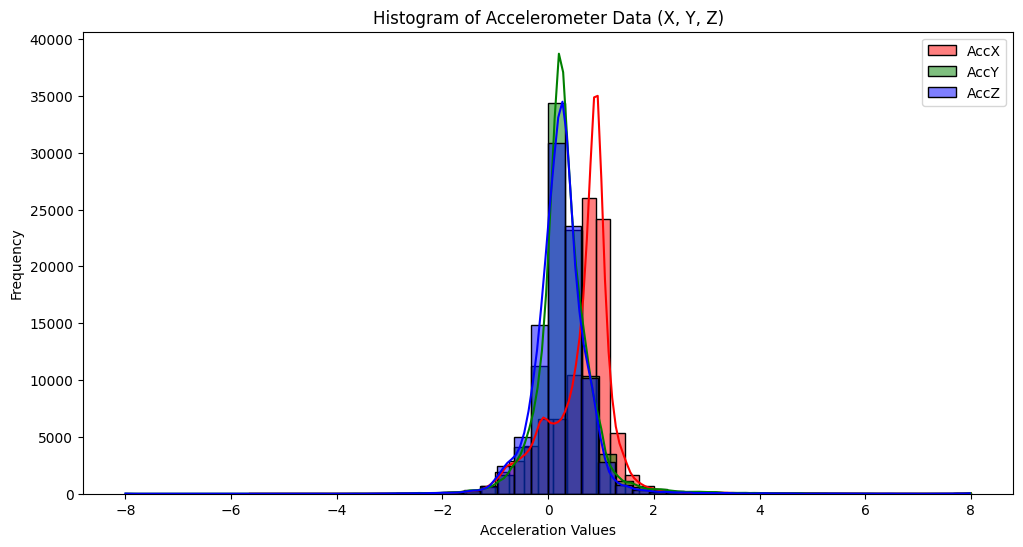

In [ ]:
import seaborn as sns

# Set plot size
plt.figure(figsize=(12, 6))

# Plot histograms for each acceleration axis
sns.histplot(df['ms_accelerometer_x'], bins=50, kde=True, color='r', label='AccX', alpha=0.5)
sns.histplot(df['ms_accelerometer_y'], bins=50, kde=True, color='g', label='AccY', alpha=0.5)
sns.histplot(df['ms_accelerometer_z'], bins=50, kde=True, color='b', label='AccZ', alpha=0.5)

plt.title("Histogram of Accelerometer Data (X, Y, Z)")
plt.xlabel("Acceleration Values")
plt.ylabel("Frequency")
plt.legend()
plt.show()


**FFT** converts time-domain signals into frequency-domain, helping us analyze motion patterns.

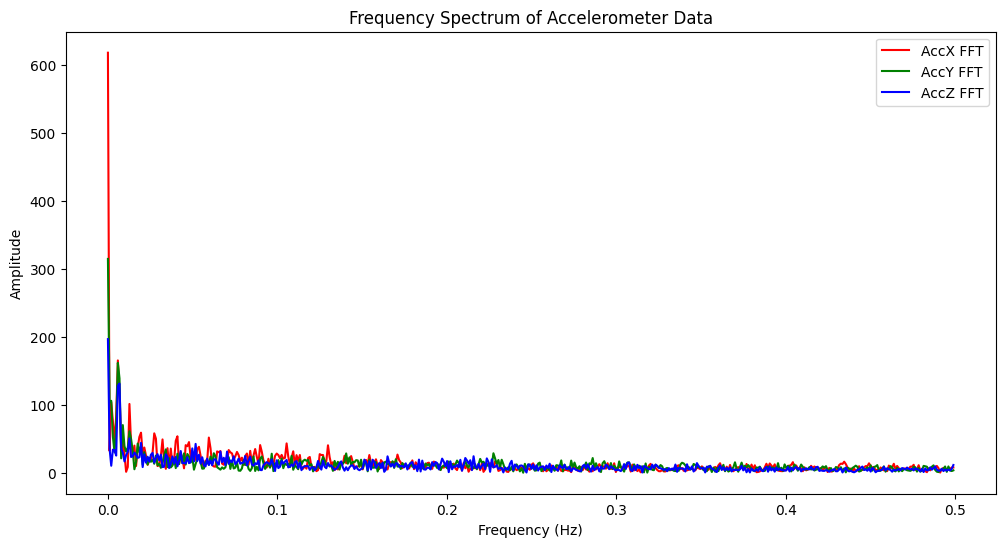

In [ ]:
import numpy as np

# Select a window of data (e.g., first 1024 samples)
N = 1024  # Number of samples for FFT
acc_x = df['ms_accelerometer_x'][:N]
acc_y = df['ms_accelerometer_y'][:N]
acc_z = df['ms_accelerometer_z'][:N]

# Compute FFT
freqs = np.fft.fftfreq(N)  # Frequency bins
fft_x = np.abs(np.fft.fft(acc_x))
fft_y = np.abs(np.fft.fft(acc_y))
fft_z = np.abs(np.fft.fft(acc_z))

# Plot FFT results
plt.figure(figsize=(12, 6))
plt.plot(freqs[:N//2], fft_x[:N//2], label='AccX FFT', color='r')
plt.plot(freqs[:N//2], fft_y[:N//2], label='AccY FFT', color='g')
plt.plot(freqs[:N//2], fft_z[:N//2], label='AccZ FFT', color='b')

plt.title("Frequency Spectrum of Accelerometer Data")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()


**Spectrograms** show how frequencies change over time, which is useful for detecting sudden changes like falls.

In [ ]:
import scipy.stats as stats

# Feature extraction function
def extract_features(df):
    features = {}

    # Compute statistical features for each axis
    for axis in ['ms_accelerometer_x', 'ms_accelerometer_y', 'ms_accelerometer_z']:
        features[f'{axis}_mean'] = np.mean(df[axis])
        features[f'{axis}_variance'] = np.var(df[axis])
        features[f'{axis}_energy'] = np.sum(np.square(df[axis]))
        features[f'{axis}_entropy'] = stats.entropy(np.abs(df[axis]) + 1e-10)  # Adding small value to avoid log(0)

    return features

# Extract features from entire dataset
features_df = df.apply(extract_features, axis=1)  # Apply to each row

# Convert to DataFrame
features_df = pd.DataFrame(features_df.tolist())

# Display sample extracted features
print(features_df.head())


   ms_accelerometer_x_mean  ms_accelerometer_x_variance  \
0                 1.058105                          0.0   
1                 0.718506                          0.0   
2                 0.718506                          0.0   
3                 0.960205                          0.0   
4                 0.960205                          0.0   

   ms_accelerometer_x_energy  ms_accelerometer_x_entropy  \
0                   1.119587                         0.0   
1                   0.516251                         0.0   
2                   0.516251                         0.0   
3                   0.921994                         0.0   
4                   0.921994                         0.0   

   ms_accelerometer_y_mean  ms_accelerometer_y_variance  \
0                 0.096436                          0.0   
1                 0.233887                          0.0   
2                 0.233887                          0.0   
3                 0.190430                      

**Spectrograms** show how frequencies change over time, which is useful for detecting sudden changes like falls.

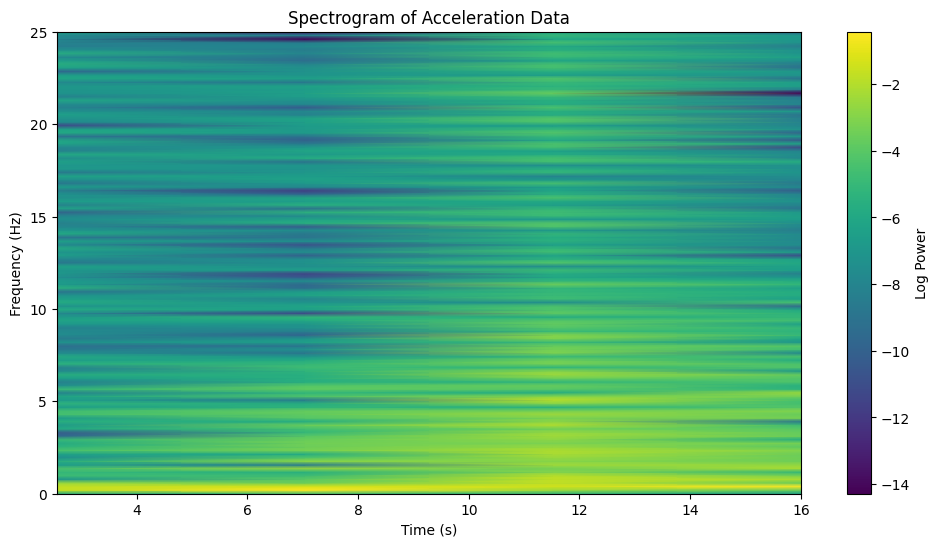

In [ ]:
import scipy.signal as signal

# Select a segment of data
N = 1024  # Number of samples
acc_x = df['ms_accelerometer_x'][:N]

# Generate spectrogram
frequencies, times, Sxx = signal.spectrogram(acc_x, fs=50)  # Assuming 50Hz sampling rate

# Plot spectrogram
plt.figure(figsize=(12, 6))
plt.pcolormesh(times, frequencies, np.log(Sxx), shading='gouraud')
plt.colorbar(label="Log Power")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.title("Spectrogram of Acceleration Data")
plt.show()


**Feature Engineering** for AI Model
Now, preparing  the dataset by combining features with labels (fall/non-fall outcomes) for AI training.

In [ ]:

features_df['outcome'] = df['outcome']

features_df.to_csv("fall_detection_features.csv", index=False)

print("Feature extraction complete! 🚀 The dataset is ready for AI training.")


Feature extraction complete! 🚀 The dataset is ready for AI training.


load Processed Feature Data

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the extracted features
df_features = pd.read_csv("fall_detection_features.csv")

# Split into features (X) and labels (y)
X = df_features.drop(columns=['outcome'])  # Feature columns
y = df_features['outcome']  # Target variable (fall or non-fall)

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Samples: {X_train.shape[0]}, Testing Samples: {X_test.shape[0]}")


Training Samples: 74224, Testing Samples: 18557


**SVM (Support Vector Machine)** - Classical ML Approach
SVM is good for binary classification problems like fall vs. non-fall.

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Train an SVM model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy * 100:.2f}%")


SVM Accuracy: 91.79%


**LSTM (Long Short-Term Memory)** - Best for Time-Series
LSTMs work well with **time-series sequential data**, which is ideal for fall detection.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Reshape data for LSTM (samples, timesteps, features)
X_train_lstm = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build LSTM model
model_lstm = Sequential([
    LSTM(64, return_sequences=True, input_shape=(1, X_train.shape[1])),
    LSTM(32),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification (fall/no-fall)
])

# Compile the model
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model_lstm.fit(X_train_lstm, y_train, epochs=20, batch_size=32, validation_data=(X_test_lstm, y_test))

# Evaluate model
loss, accuracy = model_lstm.evaluate(X_test_lstm, y_test)
print(f"LSTM Accuracy: {accuracy * 100:.2f}%")


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2320/2320 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.9106 - loss: 0.3087 - val_accuracy: 0.9178 - val_loss: 0.2425
Epoch 2/20
2320/2320 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.9155 - loss: 0.2437 - val_accuracy: 0.9178 - val_loss: 0.2413
Epoch 3/20
2320/2320 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9191 - loss: 0.2353 - val_accuracy: 0.9166 - val_loss: 0.2395
Epoch 4/20
2320/2320 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9190 - loss: 0.2370 - val_accuracy: 0.9181 - val_loss: 0.2387
Epoch 5/20
2320/2320 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9198 - loss: 0.2317 - val_accuracy: 0.9171 - val_loss: 0.2388
Epoch 6/20
2320/2320 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.9201 - loss: 0.2327 - val_accuracy: 0.9178 - val_loss: 0.2381
Epoch 7/20
2320/2320 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.9173 - loss: 0.2378 - val_accuracy: 0.9176 - val_loss: 0.2392
Epoch 8/20
2320/2320 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9185 - loss: 0.2360 - val_

**CNN (Convolutional Neural Network)** - Feature-Based Deep Learning

In [ ]:
from tensorflow.keras.layers import Conv1D, Flatten, Dropout

# Reshape data for CNN (samples, timesteps, features)
X_train_cnn = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build CNN model
model_cnn = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    Conv1D(64, kernel_size=3, activation='relu'),
    Flatten(),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model_cnn.fit(X_train_cnn, y_train, epochs=20, batch_size=32, validation_data=(X_test_cnn, y_test))

# Evaluate model
loss, accuracy = model_cnn.evaluate(X_test_cnn, y_test)
print(f"CNN Accuracy: {accuracy * 100:.2f}%")


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2320/2320 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9143 - loss: 0.2932 - val_accuracy: 0.9170 - val_loss: 0.2446
Epoch 2/20
2320/2320 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9154 - loss: 0.2504 - val_accuracy: 0.9163 - val_loss: 0.2445
Epoch 3/20
2320/2320 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9156 - loss: 0.2466 - val_accuracy: 0.9168 - val_loss: 0.2407
Epoch 4/20
2320/2320 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9172 - loss: 0.2424 - val_accuracy: 0.9169 - val_loss: 0.2415
Epoch 5/20
2320/2320 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9171 - loss: 0.2411 - val_accuracy: 0.9172 - val_loss: 0.2400
Epoch 6/20
2320/2320 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9169 - loss: 0.2398 - val_accuracy: 0.9169 - val_loss: 0.2393
Epoch 7/20
2320/2320 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9175 - loss: 0.2398 - val_accuracy: 0.9179 - val_loss: 0.2397
Epoch 8/20
2320/2320 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9189 - loss: 0.2360 - val_ac

# **Train & Compare Models**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the extracted features
df_features = pd.read_csv("fall_detection_features.csv")

# Split into features (X) and labels (y)
X = df_features.drop(columns=['outcome'])  # Feature columns
y = df_features['outcome']  # Target variable (fall or non-fall)

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Samples: {X_train.shape[0]}, Testing Samples: {X_test.shape[0]}")


Training Samples: 74224, Testing Samples: 18557


**Train & Evaluate SVM**

In [ ]:
from sklearn.svm import SVC

# Train SVM
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test)

# Accuracy
svm_acc = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {svm_acc * 100:.2f}%")


SVM Accuracy: 91.79%


**Train & Evaluate LSTM**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Reshape for LSTM (samples, timesteps, features)
X_train_lstm = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build LSTM model
model_lstm = Sequential([
    LSTM(64, return_sequences=True, input_shape=(1, X_train.shape[1])),
    LSTM(32),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model_lstm.fit(X_train_lstm, y_train, epochs=20, batch_size=32, validation_data=(X_test_lstm, y_test))

# Evaluate
loss, lstm_acc = model_lstm.evaluate(X_test_lstm, y_test)
print(f"LSTM Accuracy: {lstm_acc * 100:.2f}%")


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2320/2320 ━━━━━━━━━━━━━━━━━━━━ 30s 11ms/step - accuracy: 0.9151 - loss: 0.2997 - val_accuracy: 0.9169 - val_loss: 0.2472
Epoch 2/20
2320/2320 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9177 - loss: 0.2408 - val_accuracy: 0.9178 - val_loss: 0.2414
Epoch 3/20
2320/2320 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9193 - loss: 0.2363 - val_accuracy: 0.9178 - val_loss: 0.2402
Epoch 4/20
2320/2320 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9173 - loss: 0.2391 - val_accuracy: 0.9169 - val_loss: 0.2413
Epoch 5/20
2320/2320 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9178 - loss: 0.2392 - val_accuracy: 0.9179 - val_loss: 0.2388
Epoch 6/20
2320/2320 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9199 - loss: 0.2340 - val_accuracy: 0.9181 - val_loss: 0.2384
Epoch 7/20
2320/2320 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9177 - loss: 0.2391 - val_accuracy: 0.9184 - val_loss: 0.2377
Epoch 8/20
2320/2320 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.9200 - loss: 0.2334 - val

**Train & Evaluate CNN**

In [ ]:
from tensorflow.keras.layers import Conv1D, Flatten, Dropout

# Reshape for CNN
X_train_cnn = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build CNN model
model_cnn = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    Conv1D(64, kernel_size=3, activation='relu'),
    Flatten(),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model_cnn.fit(X_train_cnn, y_train, epochs=20, batch_size=32, validation_data=(X_test_cnn, y_test))

# Evaluate
loss, cnn_acc = model_cnn.evaluate(X_test_cnn, y_test)
print(f"CNN Accuracy: {cnn_acc * 100:.2f}%")


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2320/2320 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9069 - loss: 0.3076 - val_accuracy: 0.9170 - val_loss: 0.2448
Epoch 2/20
2320/2320 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9158 - loss: 0.2532 - val_accuracy: 0.9167 - val_loss: 0.2438
Epoch 3/20
2320/2320 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9197 - loss: 0.2412 - val_accuracy: 0.9177 - val_loss: 0.2406
Epoch 4/20
2320/2320 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9153 - loss: 0.2481 - val_accuracy: 0.9167 - val_loss: 0.2429
Epoch 5/20
2320/2320 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9174 - loss: 0.2445 - val_accuracy: 0.9170 - val_loss: 0.2401
Epoch 6/20
2320/2320 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9163 - loss: 0.2427 - val_accuracy: 0.9172 - val_loss: 0.2417
Epoch 7/20
2320/2320 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9181 - loss: 0.2405 - val_accuracy: 0.9170 - val_loss: 0.2419
Epoch 8/20
2320/2320 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9190 - loss: 0.2379 - val_accur

**Compare Results**

In [ ]:
print("Model Comparison:")
print(f"SVM Accuracy: {svm_acc * 100:.2f}%")
print(f"LSTM Accuracy: {lstm_acc * 100:.2f}%")
print(f"CNN Accuracy: {cnn_acc * 100:.2f}%")


Model Comparison:
SVM Accuracy: 91.79%
LSTM Accuracy: 91.84%
CNN Accuracy: 91.77%


# **Optimization & Hyperparameter Tuning**
Now, let's fine-tune the models to push accuracy beyond 92%+. 🚀



Tuning SVM
Try adjusting C (regularization) and gamma (RBF kernel width) to improve performance.

In [ ]:
import os
print(os.listdir('/content'))  # Lists all files in the /content directory



['.config', 'SmartFall Training.csv', 'SmartFall Testing.csv', 'sample_data']


In [ ]:
import pandas as pd

# Load dataset
train_df = pd.read_csv('SmartFall Training.csv')  # Update the filename if needed
test_df = pd.read_csv('SmartFall Testing.csv')  # Update filename

# Print the first few rows to verify
print(train_df.head())
print("✅ Dataset loaded successfully!")


    ms_accelerometer_x   ms_accelerometer_y   ms_accelerometer_z  outcome
0             1.058105             0.096436             0.113037        0
1             0.718506             0.233887             0.220703        0
2             0.718506             0.233887             0.220703        0
3             0.960205             0.190430             0.051270        0
4             0.960205             0.190430             0.051270        0
✅ Dataset loaded successfully!


In [ ]:
print("Dataset Columns:", df.columns)


Dataset Columns: Index([' ms_accelerometer_x', ' ms_accelerometer_y', ' ms_accelerometer_z',
       'outcome'],
      dtype='object')


In [ ]:
# Remove leading/trailing spaces in column names
df.columns = df.columns.str.strip()

# Now select the correct features
X = df[['ms_accelerometer_x', 'ms_accelerometer_y', 'ms_accelerometer_z']].values
y = df['outcome'].values


In [ ]:
print(df.columns.tolist())



[' ms_accelerometer_x', ' ms_accelerometer_y', ' ms_accelerometer_z', 'outcome']


In [ ]:
df.columns = df.columns.str.strip()


In [ ]:
X = df[['ms_accelerometer_x', 'ms_accelerometer_y', 'ms_accelerometer_z']].values
y = df['outcome'].values


In [ ]:
# Strip spaces from column names
df.columns = df.columns.str.strip()

# Define features and labels
X = df[['ms_accelerometer_x', 'ms_accelerometer_y', 'ms_accelerometer_z']].values
y = df['outcome'].values  # Ensure 'outcome' exists in the dataset

# Verify the columns after stripping
print(df.columns.tolist())  # Should print clean column names



['ms_accelerometer_x', 'ms_accelerometer_y', 'ms_accelerometer_z', 'outcome']


**Splitting Data into Training & Testing Sets**

In [ ]:
from sklearn.model_selection import train_test_split

# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify dataset shapes
print(f"Training data shape: {X_train.shape}, Training labels shape: {y_train.shape}")
print(f"Testing data shape: {X_test.shape}, Testing labels shape: {y_test.shape}")


Training data shape: (74224, 3), Training labels shape: (74224,)
Testing data shape: (18557, 3), Testing labels shape: (18557,)


In [ ]:
import time
start_time = time.time()

random_search.fit(X_train, y_train)

end_time = time.time()
print(f"Training completed in {end_time - start_time:.2f} seconds.")


Training completed in 859.82 seconds.


**Running Grid Search for SVM Hyperparameter Tuning**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load dataset (Ensure the file path is correct)
df = pd.read_csv('SmartFall Training.csv')

# Trim any leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Define features (X) and labels (y)
X = df[['ms_accelerometer_x', 'ms_accelerometer_y', 'ms_accelerometer_z']].values
y = df['outcome'].values  # Ensure the column name is correct

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grid
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': ['scale', 0.1, 0.01, 0.001]}

# Use RandomizedSearchCV for faster tuning
random_search = RandomizedSearchCV(SVC(kernel='rbf'), param_grid, n_iter=4, cv=3, n_jobs=-1)
random_search.fit(X_train, y_train)

# Best parameters & accuracy
print(f"Best SVM Params: {random_search.best_params_}")
best_svm = random_search.best_estimator_
y_pred_svm = best_svm.predict(X_test)
print(f"Optimized SVM Accuracy: {accuracy_score(y_test, y_pred_svm) * 100:.2f}%")


Best SVM Params: {'gamma': 0.1, 'C': 10}
Optimized SVM Accuracy: 91.72%


**1. Get the Best Parameters & Model**

In [ ]:
print(f"Best Parameters: {random_search.best_params_}")



Best Parameters: {'gamma': 'scale', 'C': 0.1}


Save the best model:

In [ ]:
best_svm = random_search.best_estimator_


**2. Test the Optimized Model on X_test**

In [ ]:
y_pred = best_svm.predict(X_test)


Measure accuracy:


In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Optimized SVM Accuracy: {accuracy * 100:.2f}%")


Optimized SVM Accuracy: 91.83%


Other evaluation metrics:

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.92      1.00      0.96     16901
           1       0.85      0.10      0.18      1656

    accuracy                           0.92     18557
   macro avg       0.88      0.55      0.57     18557
weighted avg       0.91      0.92      0.89     18557

[[16870    31]
 [ 1486   170]]


**3.Save & Deploy the Model**


In [ ]:
import joblib
joblib.dump(best_svm, 'optimized_svm_model.pkl')


['optimized_svm_model.pkl']

You can later load the model using:

In [ ]:
loaded_model = joblib.load('optimized_svm_model.pkl')


**4. Use the Model for Predictions**

In [ ]:
new_data = [[0.5, -1.2, 2.3]]  # Example data (replace with real sensor values)
prediction = loaded_model.predict(new_data)
print(f"Predicted Class: {prediction[0]}")


Predicted Class: 0
